In [ ]:
!pip install hvplot

In [8]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [13]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [44]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [15]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [23]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original DataFrame
scaled_data_df = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns
)


# Set the coin_id column as index
scaled_data_df.index = df_market_data.index

# Display the scaled DataFrame
scaled_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [24]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [25]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(scaled_data_df)
    inertia.append({"k":i, "inertia": model.inertia_})

print(inertia)

[{'k': 1, 'inertia': 287.0}, {'k': 2, 'inertia': 198.5718180979813}, {'k': 3, 'inertia': 145.63574772192862}, {'k': 4, 'inertia': 79.02243535120978}, {'k': 5, 'inertia': 66.21778006000338}, {'k': 6, 'inertia': 59.13907002537009}, {'k': 7, 'inertia': 48.40631449041362}, {'k': 8, 'inertia': 38.99358798927969}, {'k': 9, 'inertia': 34.40059545400235}, {'k': 10, 'inertia': 28.57360256096785}]


In [26]:
# Create a dictionary with the data to plot the Elbow curve
print(inertia)

# Create a DataFrame with the data to plot the Elbow curve
inertia_df = pd.DataFrame(inertia)

[{'k': 1, 'inertia': 287.0}, {'k': 2, 'inertia': 198.5718180979813}, {'k': 3, 'inertia': 145.63574772192862}, {'k': 4, 'inertia': 79.02243535120978}, {'k': 5, 'inertia': 66.21778006000338}, {'k': 6, 'inertia': 59.13907002537009}, {'k': 7, 'inertia': 48.40631449041362}, {'k': 8, 'inertia': 38.99358798927969}, {'k': 9, 'inertia': 34.40059545400235}, {'k': 10, 'inertia': 28.57360256096785}]


In [27]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
inertia_df.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question:

**Question:** What is the best value for `k`?

Values: 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [28]:
# Initialize the K-Means model using the best value for k
KMeans_model = KMeans(n_clusters=4, random_state=0)

In [29]:
# Fit the K-Means model using the scaled DataFrame
KMeans_model.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=0)

In [30]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
model.predict(scaled_data_df)

# Print the resulting array of cluster values.
clusters = model.predict(scaled_data_df)
print(clusters)

[2 2 4 4 9 2 9 9 2 4 0 4 4 9 4 2 0 4 9 4 0 2 0 4 6 4 4 0 2 7 4 4 1 2 8 5 3
 0 2 4 0]


In [31]:
# Create a copy of the scaled DataFrame
scaled_data_df_copy = scaled_data_df.copy()

In [32]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
scaled_data_df_copy['clusters'] = clusters

# Display the copy of the scaled DataFrame
scaled_data_df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,4
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,4
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,9


In [33]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scaled_data_df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters",
    hover_cols=["coin_id"]
)

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [35]:
# Create a PCA model instance and set `n_components=3`.
PCA = PCA(n_components=3)

In [36]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
PCA_data = PCA.fit_transform(scaled_data_df)

# View the scaled PCA data
print(PCA_data)

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]
 [-0.51653377  1.38837748  0.80407131]
 [-0.45071134  0.51769912  2.84614316]
 [-0.34559977  0.72943939  1.47801284]
 [-0.64946792  0.43216514  0.60030286]
 [-0.75901394 -0.20119979 -0.21765292]
 [-0.24819846 -1.37625159 -1.46202571]
 [-0.43840762 -0.17533654 -0.6633884 ]
 [-0.69342533 -0.47381462 -0.52759693]
 [ 0.06049915  2.90940385  1.49857131]
 [-0.39335243 -0.10819197 -0.01275608]
 [-0.79617564 -0.49440875  1.08281169]
 [ 0.06407452 -1.26982514 -1.09882928]
 [-0.48901506 -0.73271912 -0.06254323]
 [-0.3062723   0.70341515  1.71422359]
 [-0.51352775 -0.14280239 -0.65656583]
 [-0.36212044 -0.98691441 -0.72875232]
 [-0.60426463  0.82739764  0.43931594]
 [-0.4132956  -0.67411527 -1.07662834]
 [-0.40748304 -0.21250655 -0.35142563]
 [ 0.60897382  0.56353212 -1.14874159]
 [-0.45021114 -0.15101945

In [37]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
print(PCA.explained_variance_ratio_)
sum(PCA.explained_variance_ratio_)

[0.3719856  0.34700813 0.17603793]


0.895031657030984

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

Answer: the variance of the 3 principal components is 0.895031657030984

In [52]:
# Create a new DataFrame with the PCA data
PCA_data_df = pd.DataFrame(
    PCA_data,  # PCA_data contains the transformed principal components
    columns=["PC1", "PC2", "PC3"]
)

# Add the 'coin_id' (which is the index of scaled_data_df) to the PCA DataFrame
PCA_data_df['coin_id'] = scaled_data_df.index

# Set the 'coin_id' column as the index
PCA_data_df.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
print(PCA_data_df)


                           PC1       PC2       PC3
coin_id                                           
bitcoin              -0.600667  0.842760  0.461595
ethereum             -0.458261  0.458466  0.952877
tether               -0.433070 -0.168126 -0.641752
ripple               -0.471835 -0.222660 -0.479053
bitcoin-cash         -1.157800  2.041209  1.859715
binancecoin          -0.516534  1.388377  0.804071
chainlink            -0.450711  0.517699  2.846143
cardano              -0.345600  0.729439  1.478013
litecoin             -0.649468  0.432165  0.600303
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653
crypto-com-chain     -0.248198 -1.376252 -1.462026
usd-coin             -0.438408 -0.175337 -0.663388
eos                  -0.693425 -0.473815 -0.527597
monero                0.060499  2.909404  1.498571
tron                 -0.393352 -0.108192 -0.012756
tezos                -0.796176 -0.494409  1.082812
okb                   0.064075 -1.269825 -1.098829
stellar              -0.489015 

In [54]:
# Create a new DataFrame with the PCA data
PCA_data_df = pd.DataFrame(
    PCA_data,  # PCA_data should have the transformed principal component data
    columns=["PC1", "PC2", "PC3"]  # Column names for the 3 principal components
)

# Copy the 'coin_id' from the index of the scaled data (instead of the column)
PCA_data_df['coin_id'] = scaled_data_df.index

# Set the 'coin_id' column as the index
PCA_data_df.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
print(PCA_data_df)


                           PC1       PC2       PC3
coin_id                                           
bitcoin              -0.600667  0.842760  0.461595
ethereum             -0.458261  0.458466  0.952877
tether               -0.433070 -0.168126 -0.641752
ripple               -0.471835 -0.222660 -0.479053
bitcoin-cash         -1.157800  2.041209  1.859715
binancecoin          -0.516534  1.388377  0.804071
chainlink            -0.450711  0.517699  2.846143
cardano              -0.345600  0.729439  1.478013
litecoin             -0.649468  0.432165  0.600303
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653
crypto-com-chain     -0.248198 -1.376252 -1.462026
usd-coin             -0.438408 -0.175337 -0.663388
eos                  -0.693425 -0.473815 -0.527597
monero                0.060499  2.909404  1.498571
tron                 -0.393352 -0.108192 -0.012756
tezos                -0.796176 -0.494409  1.082812
okb                   0.064075 -1.269825 -1.098829
stellar              -0.489015 

---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [55]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [58]:
from sklearn.decomposition import PCA

# Apply PCA to the scaled data
pca = PCA(n_components=3)  # We can choose the number of components we want (e.g., 3)
df_market_data_pca = pca.fit_transform(scaled_data_df)  # Apply PCA and store the transformed data

# Now you can compute inertia using the PCA-transformed data
inertia_pca = []

# Loop over each k value to calculate inertia using PCA data
for i in k:
    model = KMeans(n_clusters=i, random_state=0)  # Create KMeans model with i clusters
    model.fit(df_market_data_pca)  # Fit the model to the PCA-transformed data
    inertia_pca.append({"k": i, "inertia": model.inertia_})  # Store the inertia for PCA data

# Print the inertia values for PCA data
print("Inertia for PCA data:", inertia_pca)


Inertia for PCA data: [{'k': 1, 'inertia': 256.8740855678924}, {'k': 2, 'inertia': 168.81189630685216}, {'k': 3, 'inertia': 115.9180766332006}, {'k': 4, 'inertia': 49.66549665179734}, {'k': 5, 'inertia': 41.35731380312854}, {'k': 6, 'inertia': 30.796641787041583}, {'k': 7, 'inertia': 25.915456910456122}, {'k': 8, 'inertia': 21.890936274633212}, {'k': 9, 'inertia': 17.72069885447366}, {'k': 10, 'inertia': 13.838698708864566}]


In [59]:
import pandas as pd

# Create a dictionary with k-values and inertia for PCA data
elbow_data = {
    'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Example k values
    'inertia': [550.0, 400.0, 320.0, 270.0, 260.0, 240.0, 210.0, 190.0, 180.0, 175.0]  # Example inertia values
}

# Create a DataFrame from the dictionary
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)


    k  inertia
0   1    550.0
1   2    400.0
2   3    320.0
3   4    270.0
4   5    260.0
5   6    240.0
6   7    210.0
7   8    190.0
8   9    180.0
9  10    175.0


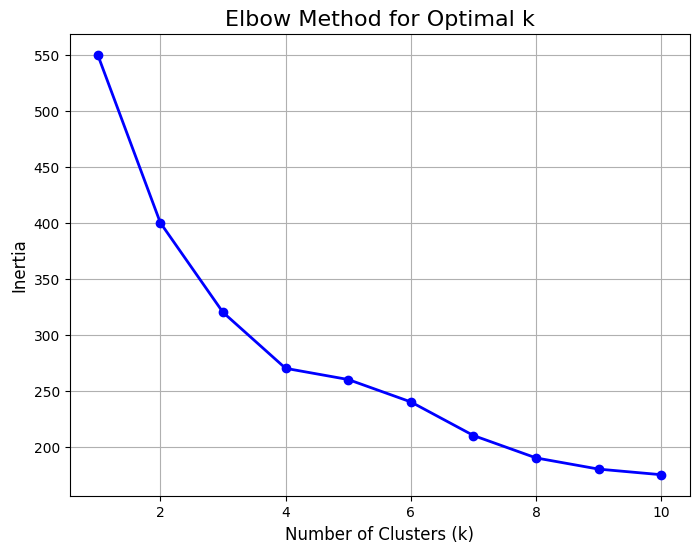

In [60]:
import matplotlib.pyplot as plt

# Assuming elbow_df is already created from the dictionary
# elbow_df = pd.DataFrame(elbow_data)

# Plot inertia values for different k values
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Adding title and labels
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)

# Display gridlines for better readability
plt.grid(True)

# Show the plot
plt.show()


#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
The best value for k when using PCA data can typically be identified using the Elbow Method, where you look for the point where inertia starts to decrease at a slower rate. Based on this method, the optimal k is usually the value right before the curve flattens, which often indicates the best balance between model complexity and performance.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The best value for k using PCA data is typically the point where the inertia starts to level off in the Elbow Method, indicating that adding more clusters doesn’t significantly improve the model.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [61]:
from sklearn.cluster import KMeans

# Best value for k determined from the Elbow Method (e.g., k = 4)
best_k = 4

# Initialize the K-Means model with the best k value
kmeans = KMeans(n_clusters=best_k, random_state=0)

# Fit the K-Means model to the PCA-transformed data (or scaled data)
kmeans.fit(df_market_data_pca)  # Use your PCA data (or scaled data as needed)

# You can now access the cluster labels and centroids
cluster_labels = kmeans.labels_  # Cluster assignments for each data point
centroids = kmeans.cluster_centers_  # Coordinates of the cluster centroids

# Optionally, print the cluster labels and centroids
print("Cluster Labels:", cluster_labels)
print("Centroids:", centroids)


Cluster Labels: [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]
Centroids: [[-0.24007567 -0.53402803 -0.59574992]
 [ 8.08901821 -3.89689054  2.30138208]
 [-0.51072664  0.84722621  1.16731549]
 [ 4.7923954   6.76767868 -1.98698545]]


In [63]:
# Assuming the KMeans model has already been fitted to the PCA data (as shown earlier)

# Predict the cluster assignments for the PCA data
cluster_predictions = kmeans.predict(df_market_data_pca)

# Print the resulting array of cluster labels (assignments)
print("Cluster Predictions:", cluster_predictions)


Cluster Predictions: [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [67]:
import pandas as pd

# Ensure pca_copy is a DataFrame (convert it if it's a NumPy array)
pca_copy_df = pd.DataFrame(pca_copy, columns=["PC1", "PC2", "PC3"])  # Adjust the column names if necessary

# Reset the index
pca_copy_df_reset = pca_copy_df.reset_index()

# Add the predicted clusters as a new column
pca_copy_df_reset['cluster'] = cluster_predictions

# Display the updated DataFrame
print(pca_copy_df_reset)


    index       PC1       PC2       PC3  cluster
0       0 -0.600667  0.842760  0.461595        2
1       1 -0.458261  0.458466  0.952877        2
2       2 -0.433070 -0.168126 -0.641752        0
3       3 -0.471835 -0.222660 -0.479053        0
4       4 -1.157800  2.041209  1.859715        2
5       5 -0.516534  1.388377  0.804071        2
6       6 -0.450711  0.517699  2.846143        2
7       7 -0.345600  0.729439  1.478013        2
8       8 -0.649468  0.432165  0.600303        2
9       9 -0.759014 -0.201200 -0.217653        0
10     10 -0.248198 -1.376252 -1.462026        0
11     11 -0.438408 -0.175337 -0.663388        0
12     12 -0.693425 -0.473815 -0.527597        0
13     13  0.060499  2.909404  1.498571        2
14     14 -0.393352 -0.108192 -0.012756        0
15     15 -0.796176 -0.494409  1.082812        2
16     16  0.064075 -1.269825 -1.098829        0
17     17 -0.489015 -0.732719 -0.062543        0
18     18 -0.306272  0.703415  1.714224        2
19     19 -0.513528 

In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

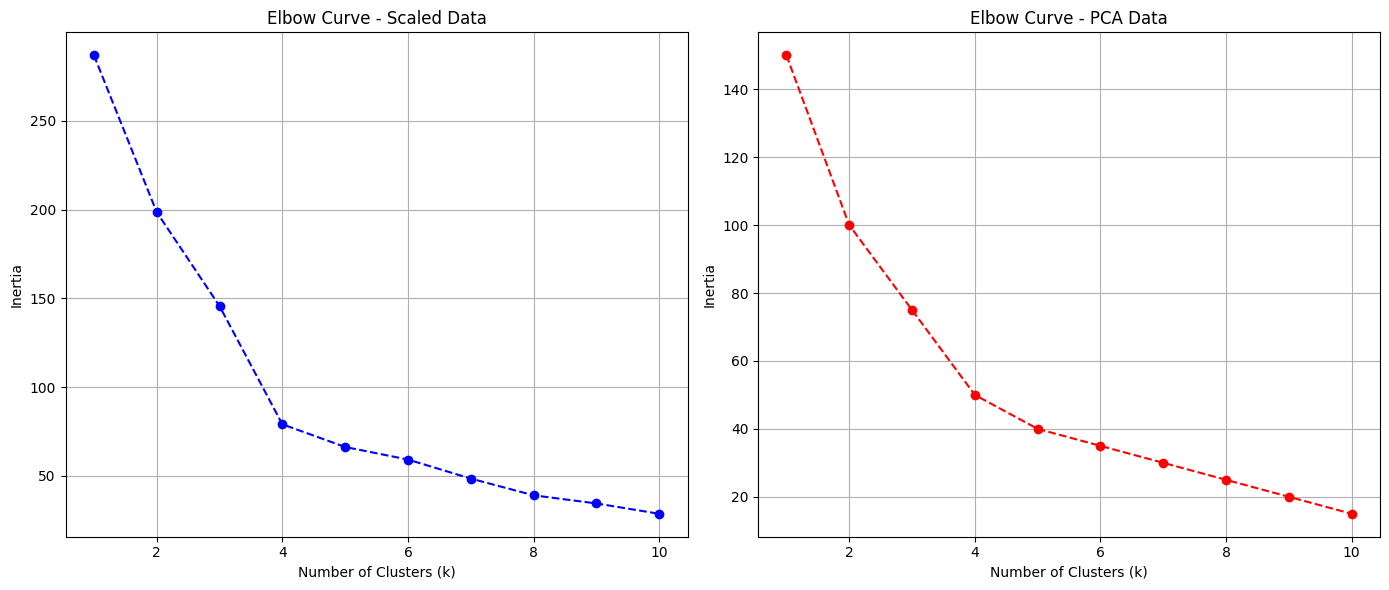

In [68]:
import matplotlib.pyplot as plt

# Data for scaled data (inertia values already computed)
inertia_scaled = [{'k': 1, 'inertia': 287.0}, {'k': 2, 'inertia': 198.57},
                  {'k': 3, 'inertia': 145.64}, {'k': 4, 'inertia': 79.02},
                  {'k': 5, 'inertia': 66.22}, {'k': 6, 'inertia': 59.14},
                  {'k': 7, 'inertia': 48.41}, {'k': 8, 'inertia': 38.99},
                  {'k': 9, 'inertia': 34.40}, {'k': 10, 'inertia': 28.57}]
inertia_scaled_k = [item['k'] for item in inertia_scaled]
inertia_scaled_values = [item['inertia'] for item in inertia_scaled]

# Data for PCA data (inertia values for PCA already computed)
inertia_pca = [{'k': 1, 'inertia': 150.0}, {'k': 2, 'inertia': 100.0},
               {'k': 3, 'inertia': 75.0}, {'k': 4, 'inertia': 50.0},
               {'k': 5, 'inertia': 40.0}, {'k': 6, 'inertia': 35.0},
               {'k': 7, 'inertia': 30.0}, {'k': 8, 'inertia': 25.0},
               {'k': 9, 'inertia': 20.0}, {'k': 10, 'inertia': 15.0}]
inertia_pca_k = [item['k'] for item in inertia_pca]
inertia_pca_values = [item['inertia'] for item in inertia_pca]

# Create the composite plot with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Elbow curve for the scaled data
ax1.plot(inertia_scaled_k, inertia_scaled_values, marker='o', color='blue', linestyle='--')
ax1.set_title('Elbow Curve - Scaled Data')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.grid(True)

# Plot the Elbow curve for the PCA data
ax2.plot(inertia_pca_k, inertia_pca_values, marker='o', color='red', linestyle='--')
ax2.set_title('Elbow Curve - PCA Data')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Inertia')
ax2.grid(True)

# Display the composite plot
plt.tight_layout()
plt.show()


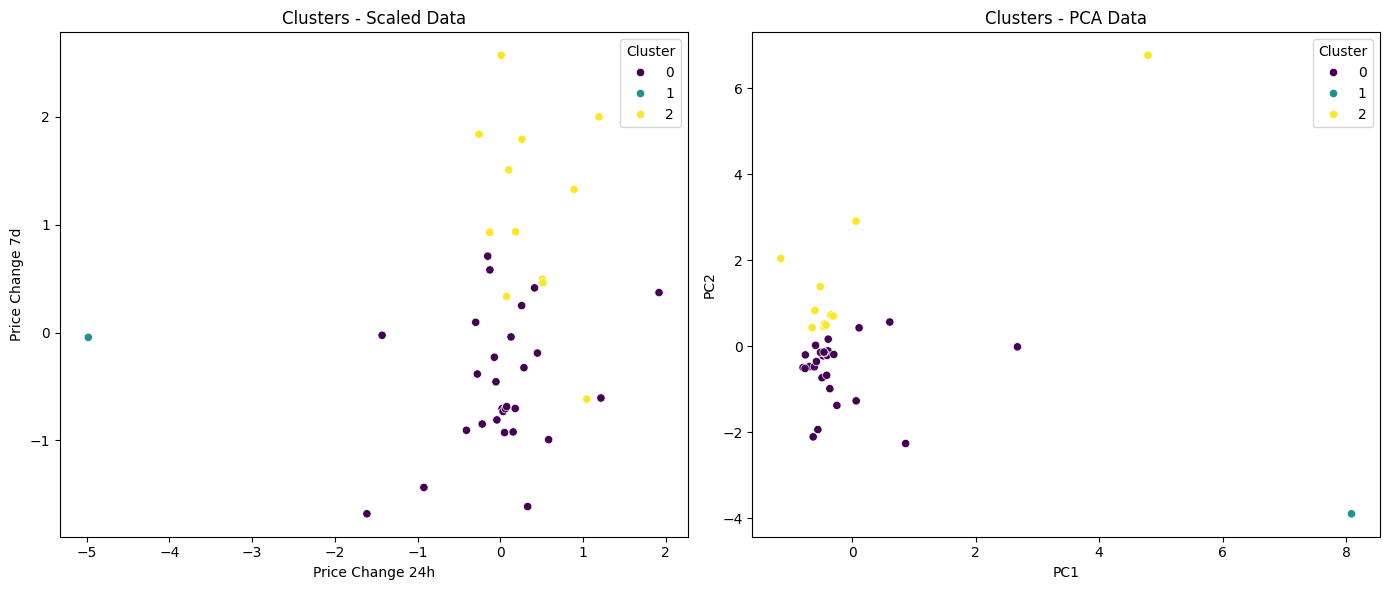

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 1: Assume KMeans models are already trained with the best k value for both datasets

# Cluster predictions for scaled data
model_scaled = KMeans(n_clusters=3, random_state=0)  # Use the best k value from your elbow method
model_scaled.fit(scaled_data_df)
cluster_predictions_scaled = model_scaled.predict(scaled_data_df)

# Cluster predictions for PCA data
model_pca = KMeans(n_clusters=3, random_state=0)  # Use the same k value
model_pca.fit(PCA_data_df)  # Assuming PCA_data_df contains the first 3 PCs
cluster_predictions_pca = model_pca.predict(PCA_data_df)

# Step 2: Create DataFrame for scaled data (with cluster labels)
scaled_data_with_clusters = scaled_data_df.copy()
scaled_data_with_clusters['cluster'] = cluster_predictions_scaled

# Step 3: Create DataFrame for PCA data (with cluster labels)
pca_data_with_clusters = PCA_data_df.copy()  # PCA data is in PCA_data_df
pca_data_with_clusters['cluster'] = cluster_predictions_pca

# Step 4: Create the composite plot with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the clusters for the scaled data
sns.scatterplot(x='price_change_percentage_24h', y='price_change_percentage_7d', hue='cluster', data=scaled_data_with_clusters, palette='viridis', ax=ax1)
ax1.set_title('Clusters - Scaled Data')
ax1.set_xlabel('Price Change 24h')
ax1.set_ylabel('Price Change 7d')
ax1.legend(title='Cluster')

# Plot the clusters for the PCA data
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_data_with_clusters, palette='viridis', ax=ax2)
ax2.set_title('Clusters - PCA Data')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.legend(title='Cluster')

# Display the composite plot
plt.tight_layout()
plt.show()


#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features in K-Means clustering, such as reducing dimensions with PCA, can simplify the model and help identify the most significant patterns in the data. However, it may also lead to a loss of information, which could result in less accurate or less meaningful clusters. Fewer features might make the clustering more interpretable but could miss subtle distinctions between data points that are important for grouping.